In [1]:
import torch
from math import pi

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import levy_stable

In [4]:
num_samples = 10000000

In [23]:
alpha = 1.7
scale = 1.

In [24]:
stable_dist = levy_stable(alpha, 0.)

In [25]:
%%time
draw = stable_dist.rvs(size=(num_samples))

CPU times: user 3.78 s, sys: 1.35 s, total: 5.14 s
Wall time: 5.14 s


In [26]:
import sys
sys.getsizeof(draw)/1e9

0.080000096

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

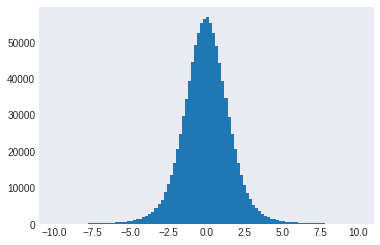

In [89]:
plt.hist(draw[:1000000], bins=100, range=(-10, 10))
plt.style.use("seaborn-dark")
plt.show()

### Simulating stable RVs on device

In [11]:
alpha

0.3

In [118]:
class SaS_cuda():
    def __init__(self, alpha):
        self.alpha = alpha
        
    def sample(self, sample_shape):
        u_1 = torch.cuda.FloatTensor((num_samples)).uniform_()
        u_2 = torch.cuda.FloatTensor((num_samples)).uniform_()
        gamma = u_1 * pi - pi/2
        w = -torch.log(1-u_2)
        A = torch.sin(self.alpha*gamma)/torch.pow(torch.cos(gamma), 1./self.alpha)
        B = torch.pow(torch.cos(gamma-self.alpha*gamma)/w, (1-self.alpha)/self.alpha)
        return (A*B).cpu().numpy()

In [141]:
w = torch.cuda.FloatTensor((10)).uniform_()
w.cpu()

tensor([0.5129, 0.2799, 0.5383, 0.5435, 0.0714, 0.0459, 0.6984, 0.6354, 0.6512,
        0.7816])

In [139]:
class SaS_numpy():
    def __init__(self, alpha):
        self.alpha = alpha
        
    def sample(self, num_samples):
        u_1 = np.random.uniform(-pi/2, pi/2, size=(num_samples))
        u_2 = np.random.uniform(size=(num_samples))
        gamma = u_1
        w = -np.log(1-u_2)
        A = np.sin(self.alpha*gamma)/np.power(np.cos(gamma), 1./self.alpha)
        B = np.power(np.cos(gamma-self.alpha*gamma)/w, (1-self.alpha)/self.alpha)
        return (A*B)

In [121]:
alpha = 1.9
dist_cuda = SaS_cuda(alpha)
dist_numpy = SaS_numpy(alpha)

In [122]:
%%time
draw_cuda = dist_cuda.sample(num_samples)

CPU times: user 66.1 ms, sys: 19.5 ms, total: 85.6 ms
Wall time: 83.5 ms


In [123]:
%%time
draw_numpy = dist_numpy.sample(num_samples)

CPU times: user 2.21 s, sys: 216 ms, total: 2.43 s
Wall time: 2.43 s


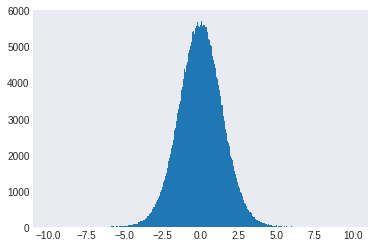

In [124]:
plt.hist(draw_cuda[-1000000:], bins=1000, range=(-10, 10))
plt.style.use("seaborn-dark")
plt.show()

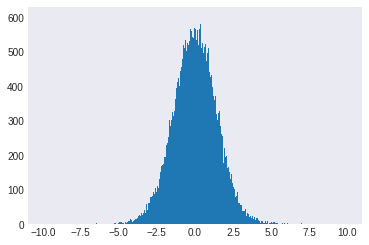

In [125]:
plt.hist(draw_numpy[:100000], bins=1000, range=(-10, 10))
plt.style.use("seaborn-dark")
plt.show()